# Logistic Regression for Sentiment Analysis

## Load dataset

In [1]:
import pandas as pd

### tf-idf

In [2]:
df = pd.read_csv(r'../resources/processed_data.csv')
df.head()

,Processed_Review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [3]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Review'], df['sentiment'], test_size=0.3, random_state=42)

In [4]:
# Chuyển đổi văn bản thành các đặc trưng số sử dụng TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=400)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Word2Vec

In [5]:
import numpy
import pickle
with open("../resources/X_w2v_train.pkl", "rb") as f:
    X_w2v_train = pickle.load(f)
with open("../resources/X_w2v_test.pkl", "rb") as f:
    X_w2v_test = pickle.load(f)
with open("../resources/y_train.pkl", "rb") as f:
    y_w2v_train = pickle.load(f)
with open("../resources/y_test.pkl", "rb") as f:
    y_w2v_test = pickle.load(f)

## Logistic Regression

### Hàm khảo sát

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def train_and_valid(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train) 
    y_pred = model.predict(X_test)
    # Đánh giá mô hình
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"training accuracy: {accuracy_train} \nvalidation accuracy: {accuracy_test}")
    print("Classification report:")
    print(report)

    # Tạo ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

### Word2Vec Logistic regression


d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training accuracy: 0.8905428571428572 
validation accuracy: 0.8873333333333333
Classification report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      7411
    positive       0.89      0.89      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

[[6546  865]
 [ 825 6764]]


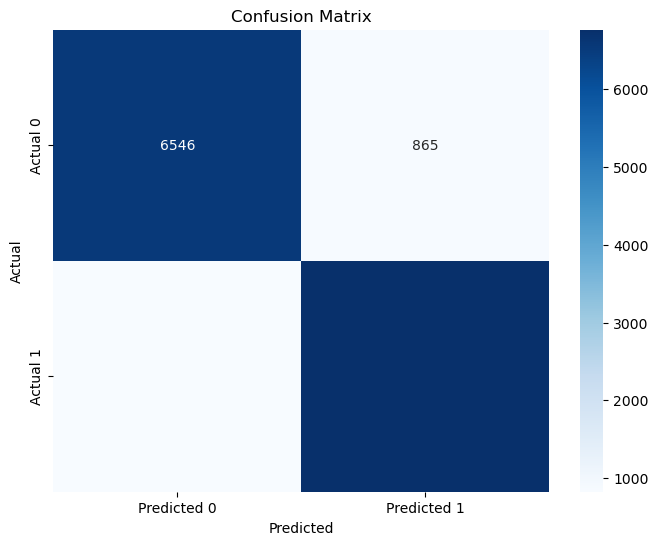

In [7]:
from sklearn.linear_model import LogisticRegression
#default

log_reg_default = LogisticRegression(random_state=42)
train_and_valid(log_reg_default, X_w2v_train, y_w2v_train, X_w2v_test, y_w2v_test)

#### Lựa chọn siêu tham số

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.5, 20),
    'tol': uniform(1e-4, 1e-2),
    'solver': ['liblinear', 'saga', 'sag', 'newton-cg', 'newton-cholesky', 'lbfgs'],
    'max_iter': [500, 1000, 2000, 4000],
    'penalty': ['l1', 'l2', 'elasticnet', None],
}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=50, cv=5)
random_search.fit(X_w2v_train, y_w2v_train)
print("best parameters: " + str(random_search.best_params_))

training accuracy: 0.8958285714285714 
validation accuracy: 0.8921333333333333
Classification report:
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      7411
    positive       0.89      0.89      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

[[6604  807]
 [ 811 6778]]


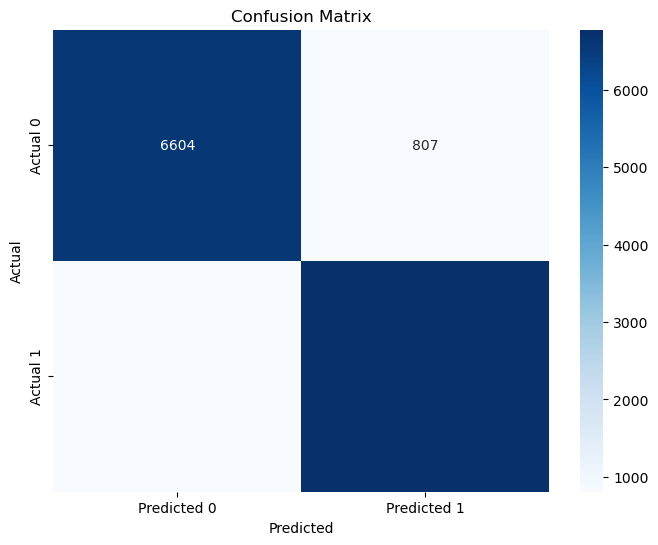

In [8]:
from sklearn.linear_model import LogisticRegression
# best hyperparameters : 
# {'C': 2.8874706871124385, 'max_iter': 4000, 'penalty': None, 'random_state': 42, 'solver': 'sag', 'tol': 0.00265293543688341}
# 0.8921

log_reg = LogisticRegression(random_state=42, max_iter=4000, penalty=None, solver='sag', tol=0.00265293543688341)
train_and_valid(log_reg, X_w2v_train, y_w2v_train, X_w2v_test, y_w2v_test)

### Tf-idf Logistic Regression

training accuracy: 0.8484167459014031 
validation accuracy: 0.8405378151260504
Classification report:
              precision    recall  f1-score   support

    negative       0.85      0.83      0.84      7404
    positive       0.83      0.85      0.84      7471

    accuracy                           0.84     14875
   macro avg       0.84      0.84      0.84     14875
weighted avg       0.84      0.84      0.84     14875

[[6122 1282]
 [1090 6381]]


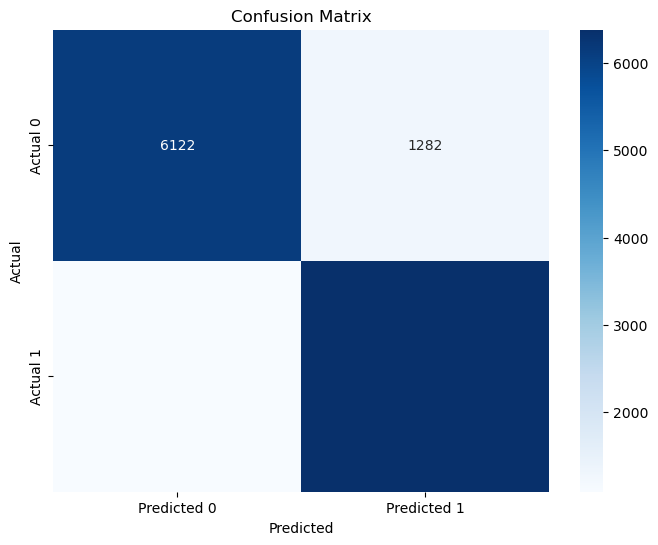

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg_tfidf_default = LogisticRegression(random_state=42, )
train_and_valid(log_reg_tfidf_default, X_train_tfidf, y_train, X_test_tfidf, y_test)

#### Lựa chọn siêu tham số

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.5, 20),
    'tol': uniform(1e-4, 1e-2),
    'solver': ['liblinear', 'saga', 'sag', 'newton-cg', 'newton-cholesky', 'lbfgs'],
    'max_iter': [500, 1000, 2000, 4000],
    'penalty': ['l1', 'l2', 'elasticnet', None],
}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=50, cv=5)
random_search.fit(X_train_tfidf, y_train)
print("best parameters: " + str(random_search.best_params_))

training accuracy: 0.8485608090586914 
validation accuracy: 0.8406722689075631
Classification report:
              precision    recall  f1-score   support

    negative       0.85      0.83      0.84      7404
    positive       0.83      0.85      0.84      7471

    accuracy                           0.84     14875
   macro avg       0.84      0.84      0.84     14875
weighted avg       0.84      0.84      0.84     14875

[[6123 1281]
 [1089 6382]]


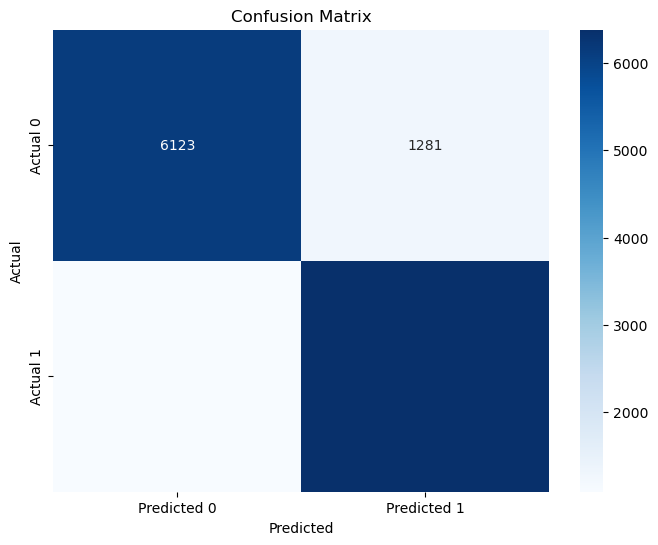

In [7]:
from sklearn.linear_model import LogisticRegression
# {'C': 1.2719457541469499, 'max_iter': 2000, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0025599743116232164}
# 0.8926
log_reg_tf_idf = LogisticRegression(
    random_state=42, 
    penalty='l2', 
    C= 1.2719457541469499, 
    max_iter=2000, 
    solver='newton-cg',
    tol= 0.0025599743116232164
)
train_and_valid(log_reg_tf_idf, X_train_tfidf, y_train, X_test_tfidf, y_test)